In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.6 MB/s eta 0:00:00


In [6]:
# preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split,StratifiedKFold ,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc,roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,average_precision_score

In [36]:
df= pd.read_csv('/content/drive/MyDrive/telemarketing_success/bank.csv' )

In [8]:
raw_df= pd.read_csv('/content/drive/MyDrive/telemarketing_success/bank.csv' )

In [ ]:
df.shape

(11162, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.sample(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
7567,37,admin.,married,secondary,no,641,yes,no,unknown,5,jun,42,1,-1,0,unknown,no
6780,30,services,single,secondary,no,-100,yes,yes,cellular,15,may,292,1,-1,0,unknown,no
5220,61,retired,married,tertiary,no,3140,yes,yes,cellular,6,aug,975,4,98,1,unknown,yes
8762,34,technician,single,secondary,no,1313,no,no,cellular,12,aug,176,1,21,6,failure,no


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# **EDA - Univariate Data analysis**

## **Features in Dataset**


1. **age**: (numeric)
1.   **job** :  type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
1.   **marital** : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
1.  **education**: categorical: "unknown","secondary","primary","tertiary"
2.  **default**: has credit in default? (categorical)
2. **housing:** has housing loan? (categorical)
1.   **loan**: has personal loan? (categorical)

**Related with the last contact of the current campaign:**

8. **contact:** contact communication type (categorical)
9. **month:** last contact month of year (categorical)
10. **day:**  last contact day of the month (numeric)
11. **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').

**Other attributes:**

12. **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
14. **previous**: number of contacts performed before this campaign and for this client (numeric)
15. **poutcome**: outcome of the previous marketing campaign (categorical)

### Distribution of the Target

<Axes: xlabel='deposit', ylabel='count'>

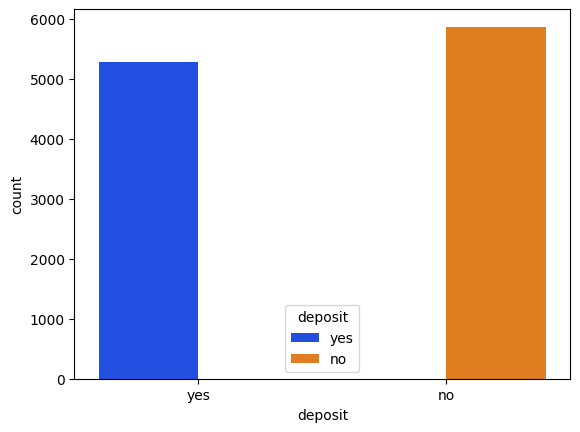

In [ ]:
sns.set_palette("bright")
sns.countplot(data=raw_df, x="deposit", hue="deposit")

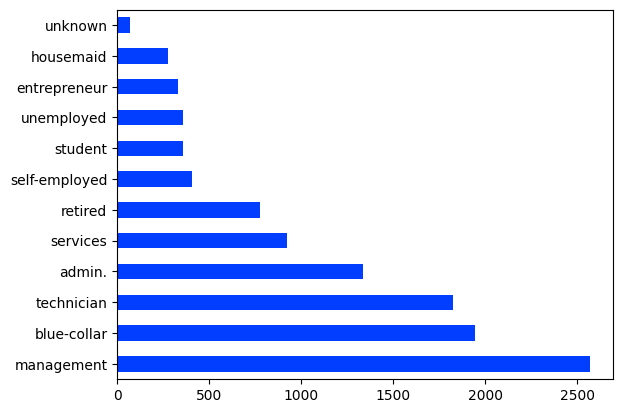

In [ ]:
raw_df.job.value_counts().plot.barh()
plt.show()

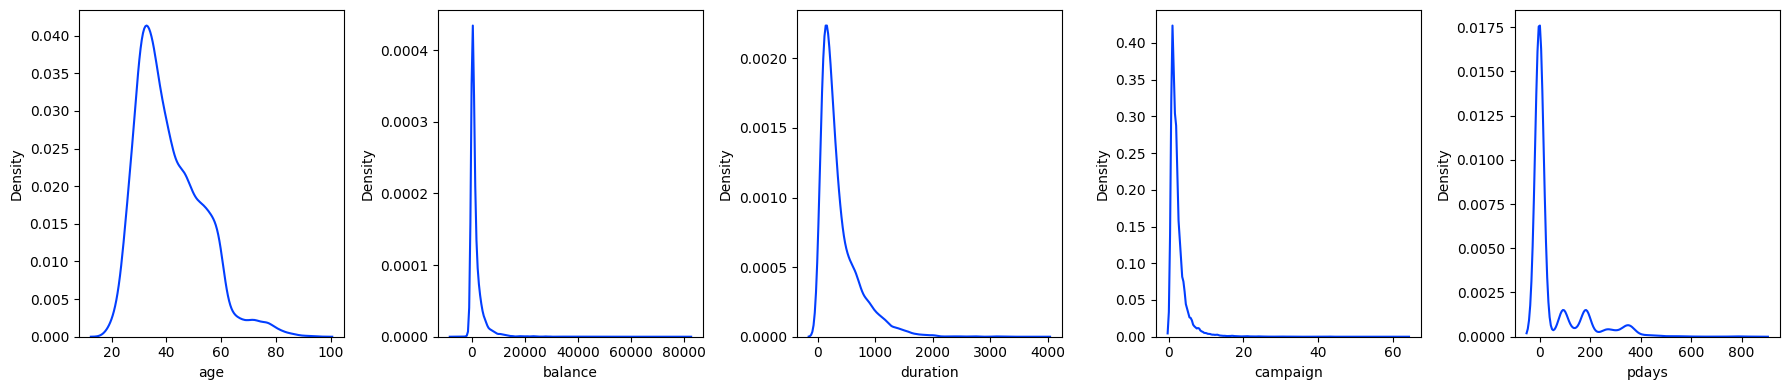

In [ ]:
num = ['age', 'balance','duration', 'campaign',"pdays"]
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 4))
j=0
for i in num:
  sns.kdeplot(df[i],ax=axes[j])
  j+=1
plt.tight_layout()
plt.show()

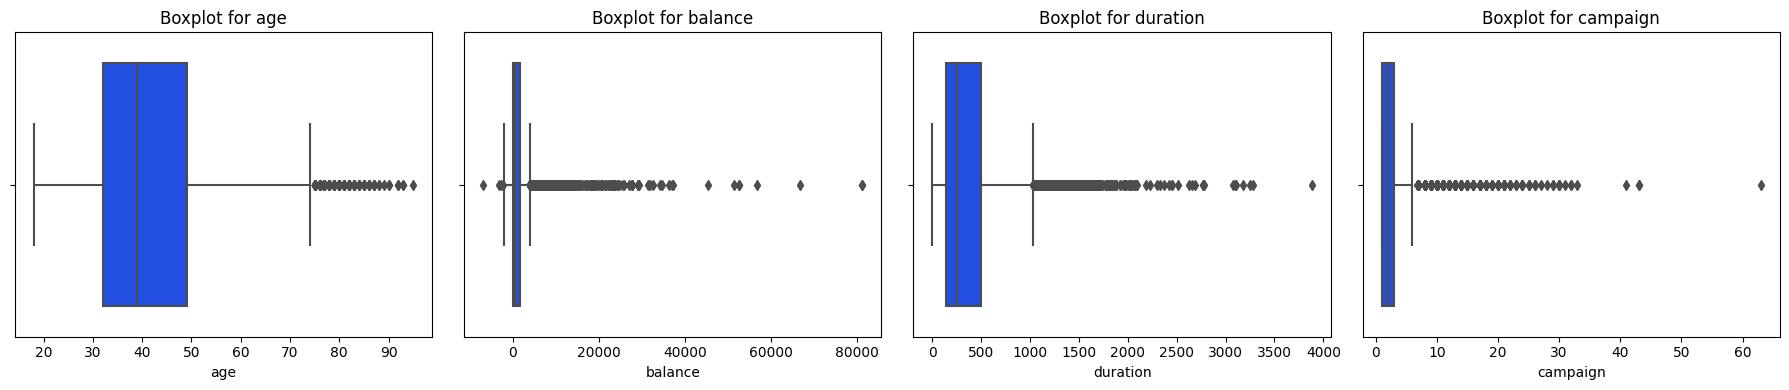

In [ ]:
num_cols = ['age', 'balance', 'duration', 'campaign']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 4))

for i, col in enumerate(num_cols):
    sns.boxplot(x=raw_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

# **Bivariate Data analysis**

## Numerical variables

<Axes: xlabel='pdays', ylabel='duration'>

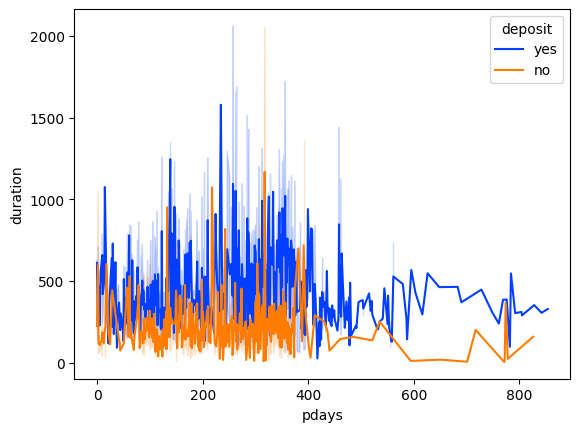

In [ ]:
sns.lineplot(data=raw_df, x="pdays", y="duration" , hue="deposit")
# duration and deposit have positive correlation

<Axes: xlabel='pdays', ylabel='balance'>

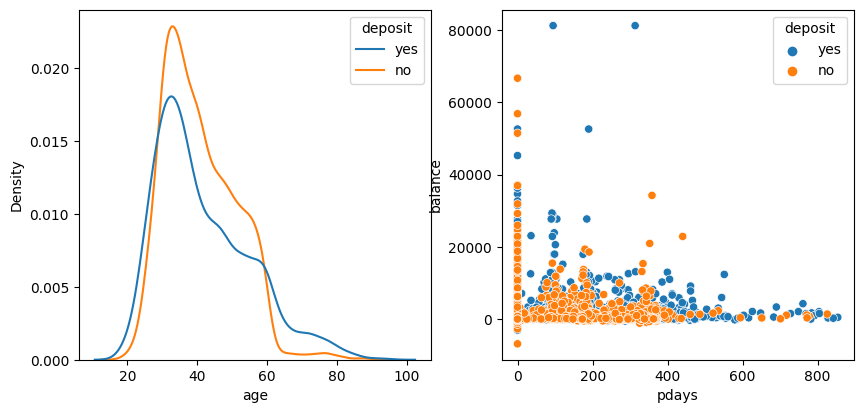

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.kdeplot(data=raw_df,x='age',hue='deposit')
plt.subplot(2,2,2)
sns.scatterplot(data=raw_df,y='balance',x="pdays",hue='deposit')

#Mostly

## Categorical Columns

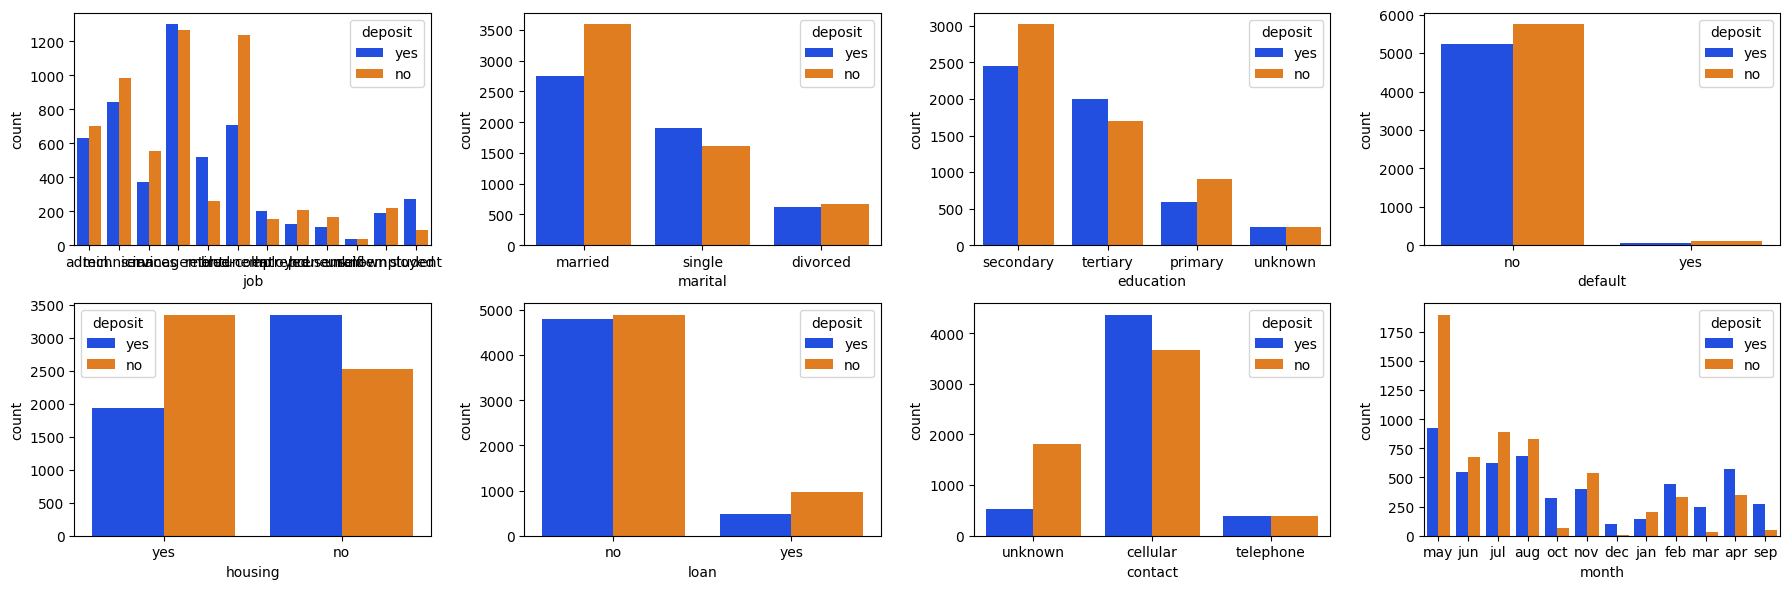

In [ ]:
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
fig, axes = plt.subplots(2, 4, figsize=(18, 6))
axes = axes.flatten()
for i, ax in enumerate(axes):
  if i < len(cols):
    sns.countplot(data=raw_df, x=cols[i], hue="deposit", ax=ax)

plt.tight_layout()
plt.show()


# **Analysis =>**

**No Class Imbalance:**
There is no significant class imbalance observed in the dataset.

**Impact of Call Duration on Subscription:**
Customers who have subscribed to the bank's term deposit policy tend to spend a longer duration on calls. This suggests a positive correlation between call duration and subscription likelihood.

**Impact of Categorical Columns on the Target Variable:**
The likelihood of subscribing to a term deposit is slightly higher among individuals who are single, have tertiary education, and do not have an existing housing loan. These demographic factors appear to influence the subscription rate positively.

**Effect of Last Contact Month on Subscription:**
The count of customers subscribing to a **term deposit is notably higher when they were last contacted in the months of February, March, April, and September.** This indicates a seasonal pattern or specific marketing effectiveness during these months.

Text(0, 0.5, 'Balance')

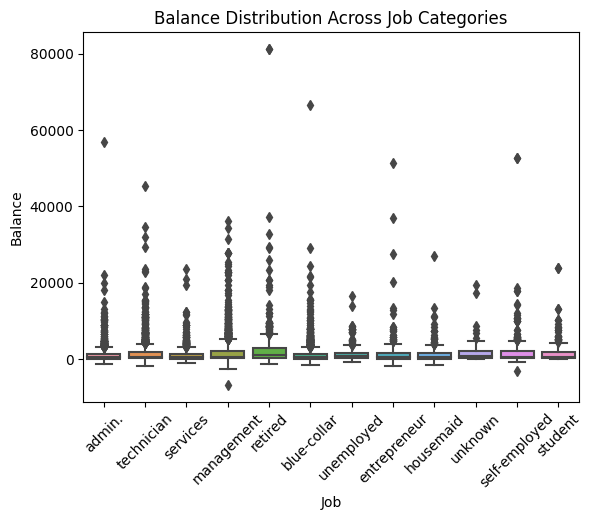

In [ ]:
sns.boxplot(raw_df,x = 'job', y = 'balance')
plt.xticks(rotation=45)
plt.title('Balance Distribution Across Job Categories')
plt.xlabel('Job')
plt.ylabel('Balance')

# **Multivariate Data analysis**

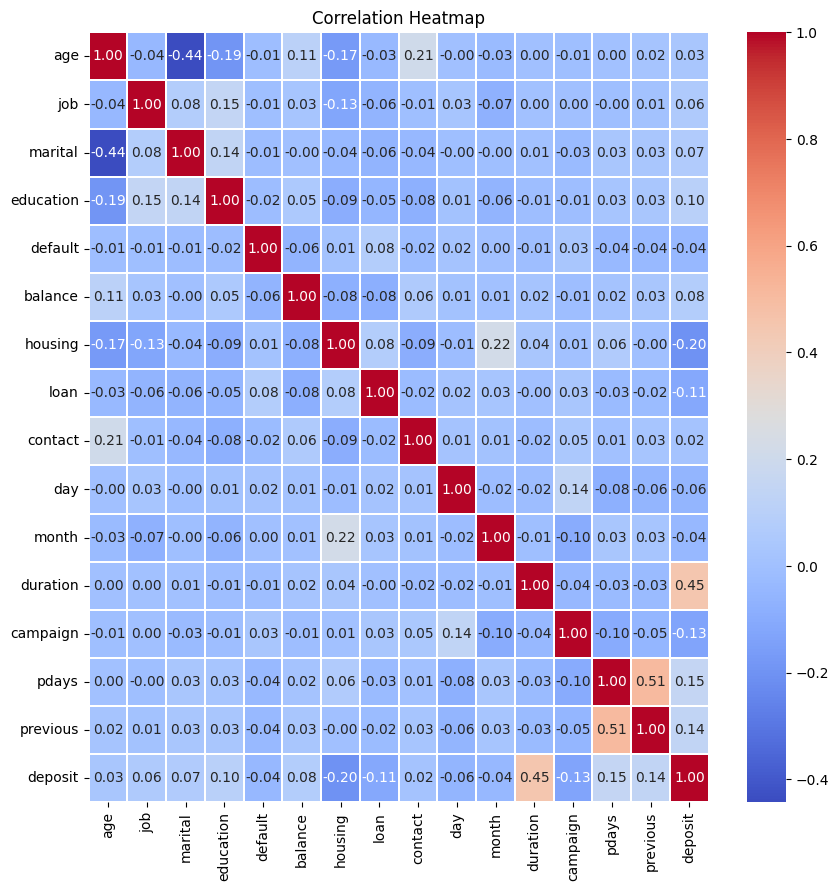

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f",linewidths=0.1)
plt.title("Correlation Heatmap")
plt.show()

# **Data Cleaning**

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

#### **pdays**: The value -1 in the 'pdays' column signifies no previous contact. **To enhance clarity, we replace -1 with 0**.

In [13]:
df.pdays.replace(-1,0,inplace=True)

Missing values in the columns ('job', 'education', 'contact') are filled with the constant 'unknown' to maintain data integrity.
To handle these missing values, **we used the SimpleImputer technique,** replacing them with the **most frequent values** in the respective columns

Job: 70 instances had missing values.
Education: 497 instances had missing values.
Contact: 2346 instances had missing values.

In [37]:
df.drop(columns=["poutcome"],axis=1,inplace=True) #unknown => 8326 => More than 50% missing records; removed for lack of substantial data.**

### **Missing Value Imputation**

In [15]:
cols = ['job','education','contact']
imputer = SimpleImputer(missing_values="unknown",strategy='most_frequent')
df[cols] =imputer.fit_transform(df[cols])

### **Target column class distribution**

In [16]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

### **Categorical Features imputation**

In [18]:
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','deposit']
label_encoders = {}
for i in cols :
    label_encoders[i] = LabelEncoder()
    df[i] = label_encoders[i].fit_transform(df[i])

In [19]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,0,1,1,0,2343,1,0,0,5,8,1042,1,0,0,1
1,56,0,1,1,0,45,0,0,0,5,8,1467,1,0,0,1
2,41,9,1,1,0,1270,1,0,0,5,8,1389,1,0,0,1


# **Train-Test Split**

In this case because we have enough data we will split the data with ratio of **80:20 for training and testing** respectively. This will result in our training data having 8929 rows and 2233 rows for the testing data.



In [20]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['deposit']),df['deposit'],test_size=0.2, random_state=55)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8929, 15), (2233, 15), (8929,), (2233,))

In [21]:
#  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
#   15 - previous: number of contacts performed before this campaign and for this client (numeric)

# **outliers on x_train**

In [22]:
num_cols = ['age', 'balance', 'duration', 'campaign','pdays']
for i in num_cols:
  print(x_train[i].skew())
  print("--------------------")

0.8772395981957813
--------------------
8.455908933818119
--------------------
2.205867361088058
--------------------
5.5798947507873065
--------------------
2.4774087146314168
--------------------


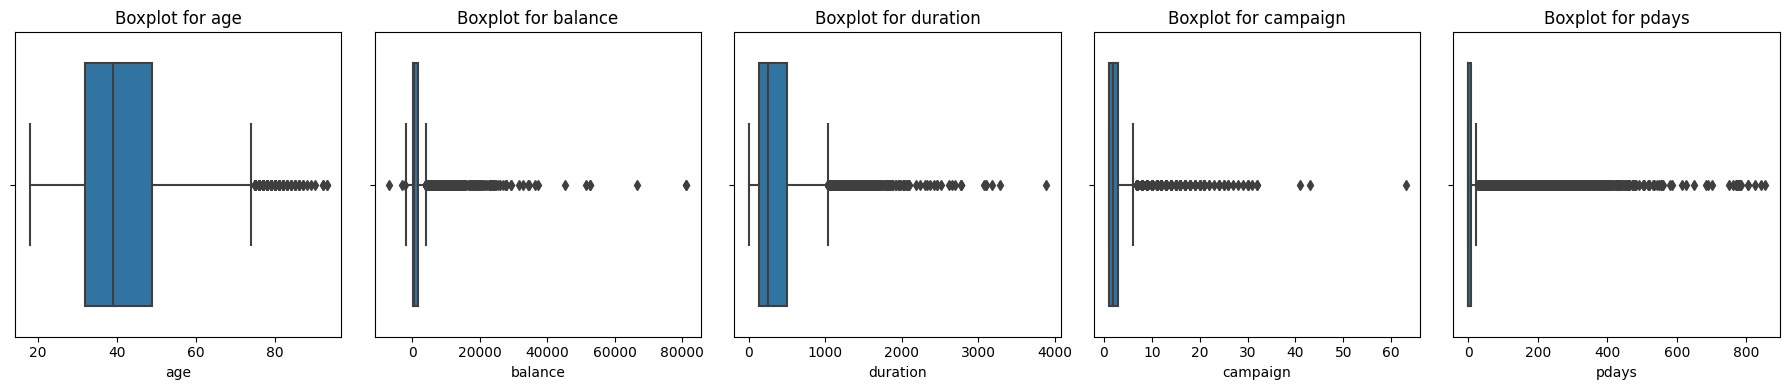

In [23]:
num_cols = ['age', 'balance', 'duration', 'campaign','pdays']
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 4))

for i, col in enumerate(num_cols):
    sns.boxplot(x=x_train[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

### **Handling Outliers**

1. Detecting Outliers using the Inter Quantile Range(IQR)
2. Capping the outliers


In [24]:
num_cols = ['age', 'balance','duration', 'campaign','pdays']

for i in num_cols:
  Q1 = np.percentile(x_train[i], 25)
  Q3 = np.percentile(x_train[i], 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  x_train[i] = np.where(x_train[i] < lower_bound, lower_bound, x_train[i])
  x_train[i] = np.where(x_train[i] > upper_bound, upper_bound, x_train[i])
  print("lower_bound :",lower_bound," ","upper_bound :",upper_bound," ","column name :",i)

lower_bound : 6.5   upper_bound : 74.5   column name : age
lower_bound : -2253.5   upper_bound : 4062.5   column name : balance
lower_bound : -400.5   upper_bound : 1035.5   column name : duration
lower_bound : -2.0   upper_bound : 6.0   column name : campaign
lower_bound : -13.5   upper_bound : 22.5   column name : pdays


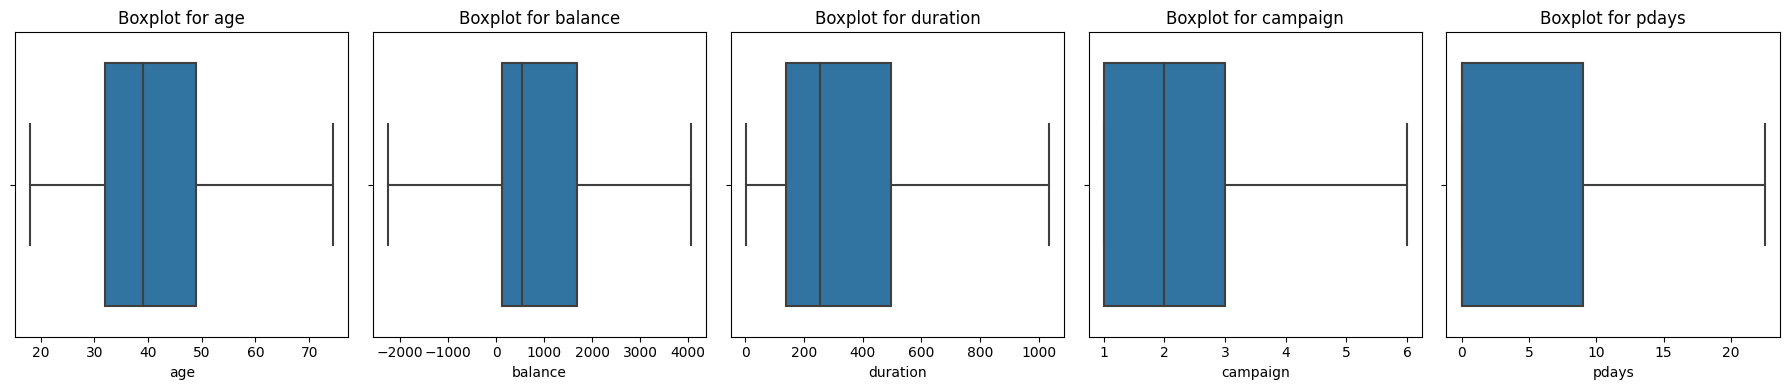

In [25]:
num_cols = ['age', 'balance', 'duration', 'campaign','pdays']
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 4))

for i, col in enumerate(num_cols):
    sns.boxplot(x=x_train[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

In [26]:
num_cols = ['age', 'balance', 'duration', 'campaign','pdays']
for i in num_cols:
  print(x_train[i].skew())
  print("--------------------")

0.7389297474540897
--------------------
1.1265814600150852
--------------------
1.0840497902727606
--------------------
1.248932092358573
--------------------
1.158145854140499
--------------------


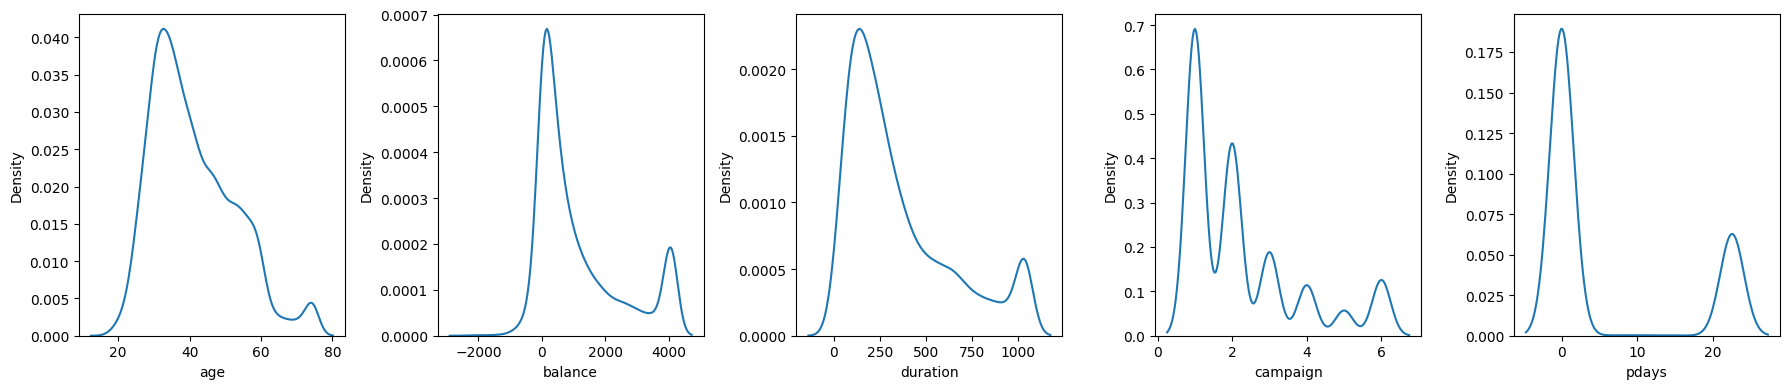

In [27]:
num = ['age', 'balance','duration', 'campaign','pdays']
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 4))
j=0
for i in num:
  sns.kdeplot(x_train[i],ax=axes[j])
  j+=1
plt.tight_layout()
plt.show()


## **Model building**

In [31]:
def evaluate_model(model,x_test,y_test):
  my_pred=model.predict(x_test)
  # Calculate metrics
  accuracy = accuracy_score(y_test,my_pred)*100
  precision = precision_score(y_test,my_pred)
  recall = recall_score(y_test,my_pred)
  conf_matrix = confusion_matrix(y_test,my_pred)
  f1 = f1_score(y_test,my_pred)

  roc_score = roc_auc_score(y_test,my_pred)
  prc_score = average_precision_score(y_test,my_pred)

  tn, fp, fn, tp = conf_matrix.ravel()
  specificity = tn / (tn + fp)
  print("Accuracy: ",accuracy)
  print("f1 score : ",f1)
  print("roc_score : " ,roc_score)
  print("prc_score : " , prc_score)
  print("Precision:",precision)
  print("Recall:",recall)
  print("specificity : ",specificity)
  print("Confusion Matrix:")
  print(conf_matrix)
  print(classification_report(y_test,my_pred))


In [ ]:
classifiers = {
    'log':LogisticRegression(max_iter=3000),
    'SVC':SVC(),
    'KNN' :KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'adaboost' : AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'catBoost':CatBoostClassifier(verbose=False),
    'XGBoost': XGBClassifier(),
    'Decision Tree':DecisionTreeClassifier()
    }
dict1 = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'AUC': [],'Specificity': [], 'PRC score': []}
for model_name, classifier in classifiers.items():
    classifier.fit(x_train,y_train)
    pred = classifier.predict(x_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, pred)*100                                       #0.2 test data
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    specificity = tn / (tn + fp)

    auc_score = roc_auc_score(y_test, pred) # Calculate ROC-AUC
    prc_score = average_precision_score(y_test,pred)

    # Append metrics to the dictionary
    dict1['Model'].append(model_name)
    dict1['Accuracy'].append(accuracy)
    dict1['Precision'].append(precision)
    dict1['Recall'].append(recall)
    dict1['F1 Score'].append(f1)
    dict1['Specificity'].append(specificity)
    dict1['AUC'].append(auc_score)
    dict1['PRC score'].append(prc_score)

metrics_df = pd.DataFrame(dict1)
print(metrics_df)

               Model   Accuracy  Precision    Recall  F1 Score       AUC  \
0                log  75.279893   0.724138  0.793548  0.757256  0.753917   
1                SVC  69.726825   0.702676  0.653456  0.677173  0.696066   
2                KNN  72.637707   0.714286  0.728111  0.721132  0.726425   
3      Random Forest  82.445141   0.809099  0.835945  0.822303  0.824767   
4           adaboost  79.892521   0.798311  0.784332  0.791260  0.798525   
5  Gradient Boosting  82.400358   0.808929  0.835023  0.821769  0.824306   
6           catBoost  84.773847   0.826468  0.869124  0.847260  0.848325   
7            XGBoost  83.161666   0.814552  0.846083  0.830018  0.832014   
8      Decision Tree  75.727721   0.758818  0.733641  0.746017  0.756629   

   Specificity  PRC score  
0     0.714286   0.674952  
1     0.738676   0.627551  
2     0.724739   0.652188  
3     0.813589   0.756075  
4     0.812718   0.730933  
5     0.813589   0.755635  
6     0.827526   0.781895  
7     0.817944 

### **Cross validation of top 2- best performing models**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracy = cross_val_score(CatBoostClassifier(verbose=False),x_train,y_train,cv=stratified_kfold, scoring='accuracy')

print("accuracy scores for each fold: ", accuracy)
print("average accuracy: ", accuracy.mean())

accuracy scores for each fold:  [0.88017917 0.8387458  0.84322508 0.8600224  0.85666293 0.84322508
 0.86898096 0.84658455 0.85106383 0.8441704 ]
average accuracy:  0.8532860213217903


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracy = cross_val_score(XGBClassifier(),x_train,y_train,cv=stratified_kfold, scoring='accuracy')

print("accuracy scores for each fold: ", accuracy)
print("average accuracy: ", accuracy.mean())

accuracy scores for each fold:  [0.87010078 0.81858903 0.83426652 0.85778275 0.8443449  0.8331467
 0.86114222 0.8331467  0.84322508 0.82286996]
average accuracy:  0.8418614636008016


**CatBoostClassifier** (cross validation results)

*   on testing data => 84.77
*   on training data (cross validation) => 85.32

**XGBClassifier** (cross validation results)
*   on testing data => 83.16
*   on training data (cross validation) => 84.18

# **Hyperparameter tuning of CatBoostClassifier**

**RandomizedSearchCV**

In [ ]:
para = {
    "depth": [3,4,5,6,7,8,9,10],
    "learning_rate":[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,1,1.5,2],
    "n_estimators":[100,125,150,175,200,215,250,275,300,400,500,600,700],
    "subsample":[0.7,0.8,0.9,1]
}
rs_catboost = RandomizedSearchCV(CatBoostClassifier(verbose=False), param_distributions=para, n_iter=10, cv=3, n_jobs=-1, random_state=42)
rs_catboost.fit(x_train , y_train)
print("Best Hyperparameters:", rs_catboost.best_params_)


Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 215, 'learning_rate': 0.09, 'depth': 5}


In [ ]:
cat = CatBoostClassifier(
    subsample= 0.8,
    n_estimators= 450,
    learning_rate= 0.09,
    depth= 5,
    cat_features=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month'],
    custom_metric=['AUC'],
    verbose=False
)
cat.fit(x_train,y_train)
evaluate_model(cat,x_test,y_test)

Accuracy:  84.63949843260188
f1 score :  0.8451467268623024
roc_score :  0.8468416320107901
prc_score :  0.7812942984447212
Precision: 0.8283185840707965
Recall: 0.8626728110599078
specificity :  0.8310104529616724
Confusion Matrix:
[[954 194]
 [149 936]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1148
           1       0.83      0.86      0.85      1085

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233



## **Feature selection using ( feature_importances_) of CatBoostClassifier**

In [ ]:
cat.feature_importances_

array([ 5.7160648 ,  4.15895423,  2.06935524,  2.78771929,  0.10831735,
        4.2247229 ,  5.34375308,  1.54007084,  0.64826419, 10.76717497,
       19.18439166, 33.41444016,  2.29236637,  5.07391632,  2.67048859])

In [ ]:
imp_feature_cat=pd.DataFrame({"Feature_Score_cat":list(cat.feature_importances_),"columns_cat":list(x_train.columns)})
feature_score_cat2=imp_feature_cat.sort_values(by='Feature_Score_cat',ascending=False)
print(feature_score_cat2)

    Feature_Score_cat columns_cat
11          33.414440    duration
10          19.184392       month
9           10.767175         day
0            5.716065         age
6            5.343753     housing
13           5.073916       pdays
5            4.224723     balance
1            4.158954         job
3            2.787719   education
14           2.670489    previous
12           2.292366    campaign
2            2.069355     marital
7            1.540071        loan
8            0.648264     contact
4            0.108317     default


In [ ]:
new_xtrain_cat=x_train.drop(["job","education","previous","campaign","marital","loan","contact","default"],axis=1)
new_xtrain_cat.head(3)

,age,balance,housing,day,month,duration,pdays
2997,42.0,254.0,0,9,2,288.0,22.5
7692,40.0,991.0,1,12,6,316.0,0.0
7866,31.0,900.0,1,9,0,221.0,22.5


In [ ]:
new_xtest_cat=x_test.drop(["job","education","previous","campaign","marital","loan","contact","default"],axis=1)
new_xtest_cat.head(3)

,age,balance,housing,day,month,duration,pdays
833,57,96,0,21,1,913,0
9934,47,145,0,1,5,163,0
7195,50,565,1,28,1,36,0


### **Fitting CatBoostClassifier** on Selected features only( **using new_xtrain and new_xtest )**

In [ ]:
cat_feature_selected = CatBoostClassifier(
    subsample= 0.8,
    n_estimators= 450,
    learning_rate= 0.09,
    depth= 5,
    cat_features=['housing', 'day', 'month'],
    custom_metric=['AUC'],
    verbose=False
)
cat_feature_selected.fit(new_xtrain_cat,y_train)

evaluate_model(cat_feature_selected,new_xtest_cat,y_test)

Accuracy:  85.57993730407524
f1 score :  0.855475763016158
roc_score :  0.8564178936720243
prc_score :  0.7914483715119592
Precision: 0.8337707786526685
Recall: 0.8783410138248848
specificity :  0.8344947735191638
Confusion Matrix:
[[958 190]
 [132 953]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1148
           1       0.83      0.88      0.86      1085

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233



## **Hyper-parameter Tuning of XGBClassifier**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3,0.5,0.05],
    'n_estimators': [100, 200, 300,400,500,600],
    'max_depth': [3, 4, 5, 6,7,8,9,10],
    'min_child_weight': [5,6,7,8,9,10],
    'subsample': [0.8,0.7,0.9,0.6,1],
    'colsample_bytree':[0.5,0.6,0.7,0.8,0.9,1]
    }
xgb = XGBClassifier(random_state=42)
rs_xgb = RandomizedSearchCV( estimator=xgb,param_distributions=param_dist,scoring='accuracy',n_iter=100,  cv=3, random_state=42,n_jobs=-1)

rs_xgb.fit(x_train,y_train)

rs_xgb_model = rs_xgb.best_estimator_
print("Best Parameters:", rs_xgb.best_params_)
print("Best accuracy:", rs_xgb.best_score_)

Best Parameters: {'subsample': 1, 'n_estimators': 200, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
Best accuracy: 0.8443274558352386


In [ ]:
xgb2 = XGBClassifier(
    subsample = 1,
    n_estimators = 200,
    min_child_weight = 7,
    max_depth = 10,
    learning_rate = 0.05,
    colsample_bytree = 0.5
)

xgb2.fit(x_train,y_train)
evaluate_model(xgb2,x_test,y_test)

Accuracy:  83.96775638154949
f1 score :  0.8388838883888389
roc_score :  0.8402073732718893
prc_score :  0.7726294879825187
Precision: 0.8197009674582234
Recall: 0.8589861751152074
specificity :  0.8214285714285714
Confusion Matrix:
[[943 205]
 [153 932]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1148
           1       0.82      0.86      0.84      1085

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



## **Feature selection using ( feature_importances_) of XGBClassifier**

In [ ]:
xgb2.feature_importances_

array([0.03220851, 0.02146725, 0.02560014, 0.03002853, 0.        ,
       0.02732285, 0.14760111, 0.05865221, 0.02885792, 0.03773506,
       0.09607603, 0.15934268, 0.02750827, 0.26964793, 0.03795151],
      dtype=float32)

In [ ]:
imp_feature_xgb2=pd.DataFrame({"Feature_Score_xgb2":list(xgb2.feature_importances_),"columns_xgb":list(x_train.columns)})
feature_score_xgb2=imp_feature_xgb2.sort_values(by='Feature_Score_xgb2',ascending=False)
print(feature_score_xgb2)

    Feature_Score_xgb2 columns_xgb
13            0.269648       pdays
11            0.159343    duration
6             0.147601     housing
10            0.096076       month
7             0.058652        loan
14            0.037952    previous
9             0.037735         day
0             0.032209         age
3             0.030029   education
8             0.028858     contact
12            0.027508    campaign
5             0.027323     balance
2             0.025600     marital
1             0.021467         job
4             0.000000     default


In [ ]:
new_xtrain_xgb=x_train.drop(["age","job","education","campaign","marital","contact","default","balance"],axis=1)
new_xtrain_xgb.head(3)

,housing,loan,day,month,duration,pdays,previous
2997,0,0,9,2,288.0,22.5,4
7692,1,0,12,6,316.0,0.0,0
7866,1,0,9,0,221.0,22.5,6


In [ ]:
new_xtest_xgb=x_test.drop(["age","job","education","campaign","marital","contact","default","balance"],axis=1)
new_xtest_xgb.head(3)

,housing,loan,day,month,duration,pdays,previous
833,0,0,21,1,913,0,0
9934,0,1,1,5,163,0,0
7195,1,1,28,1,36,0,0


### **Fitting XGBClassifier** on Selected features only( **using new_xtrain_xgb and new_xtest_xgb )**

In [ ]:
xgb3 = XGBClassifier(
    subsample = 1,
    n_estimators = 200,
    min_child_weight = 10,
    max_depth = 10,
    learning_rate = 0.05,
    colsample_bytree = 0.5
)

xgb3.fit(new_xtrain_xgb,y_train)

evaluate_model(xgb3,new_xtest_xgb,y_test)

Accuracy:  83.47514554411106
f1 score :  0.8320436959490214
roc_score :  0.8349612228841182
prc_score :  0.7689798801641696
Precision: 0.8219424460431655
Recall: 0.8423963133640553
specificity :  0.8275261324041812
Confusion Matrix:
[[950 198]
 [171 914]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1148
           1       0.82      0.84      0.83      1085

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.84      0.83      0.83      2233



## **Hyper-parameter Tuning of RandomForestClassifier**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'n_estimators': [50, 100,150, 200,250,300,350,400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None,3,4,5,6,7,8,9,10,15,16,17,18],
    'min_samples_split': [2,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}
rf2 = RandomForestClassifier(random_state=55)
rs_rf2 = RandomizedSearchCV( estimator=rf2,param_distributions=params,scoring='accuracy',n_iter=100,  cv=3, random_state=42,n_jobs=-1)

rs_rf2.fit(x_train,y_train)

rs_rf2_model = rs_rf2.best_estimator_
print("Best Parameters:", rs_rf2.best_params_)
print("Best accuracy:", rs_rf2.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'n_estimators': 300, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 17, 'class_weight': 'balanced', 'bootstrap': True}
Best accuracy: 0.8363755488614624


In [ ]:
rf2 = RandomForestClassifier(
    n_estimators= 300,
    min_samples_split= 6,
    min_samples_leaf= 2,
    max_features= "auto",
    max_depth=17,
    class_weight= "balanced",
    bootstrap= True
)

rf2.fit(x_train,y_train)

evaluate_model(rf2,x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy:  82.84818629646216
f1 score :  0.8284818629646216
roc_score :  0.8291418455659211
prc_score :  0.7585814663219678
Precision: 0.8057491289198606
Recall: 0.8525345622119815
specificity :  0.8057491289198606
Confusion Matrix:
[[925 223]
 [160 925]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1148
           1       0.81      0.85      0.83      1085

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



## **Feature selection using ( feature_importances_) of RandomForestClassifier**

In [ ]:
rf2.feature_importances_

array([0.08116372, 0.03256478, 0.01623059, 0.01756479, 0.00079114,
       0.07261038, 0.0456828 , 0.01180238, 0.00495326, 0.06470827,
       0.09116607, 0.44904015, 0.03025726, 0.03842602, 0.0430384 ])

In [ ]:
imp_feature_rf2=pd.DataFrame({"Feature_Score_rf2":list(rf2.feature_importances_),"columns_rf":list(x_train.columns)})
feature_score_rf2=imp_feature_rf2.sort_values(by='Feature_Score_rf2',ascending=False)
print(feature_score_rf2)

    Feature_Score_rf2 columns_rf
11           0.449040   duration
10           0.091166      month
0            0.081164        age
5            0.072610    balance
9            0.064708        day
6            0.045683    housing
14           0.043038   previous
13           0.038426      pdays
1            0.032565        job
12           0.030257   campaign
3            0.017565  education
2            0.016231    marital
7            0.011802       loan
8            0.004953    contact
4            0.000791    default


In [ ]:
new_xtrain_rf2=x_train.drop(["pdays","job","education","campaign","marital","contact","default","loan"],axis=1)
new_xtrain_rf2.head(3)

,age,balance,housing,day,month,duration,previous
2997,42.0,254.0,0,9,2,288.0,4
7692,40.0,991.0,1,12,6,316.0,0
7866,31.0,900.0,1,9,0,221.0,6


In [ ]:
new_xtest_rf2=x_test.drop(["pdays","job","education","campaign","marital","contact","default","loan"],axis=1)
new_xtest_rf2.head(3)

,age,balance,housing,day,month,duration,previous
833,57,96,0,21,1,913,0
9934,47,145,0,1,5,163,0
7195,50,565,1,28,1,36,0


### **Fitting RandomForestClassifier** on Selected features only( **using new_xtrain_rf2 and new_xtest_rf2 )**

In [ ]:
rf3 = RandomForestClassifier(
    n_estimators= 300,
    min_samples_split= 6,
    min_samples_leaf= 2,
    max_features= "auto",
    max_depth=15,
    class_weight= "balanced",
    bootstrap= True
)

rf3.fit(new_xtrain_rf2,y_train)
evaluate_model(rf3,new_xtest_rf2,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy:  82.93775190326915
f1 score :  0.8286099865047233
roc_score :  0.8299117680116894
prc_score :  0.7604288064500642
Precision: 0.8093145869947276
Recall: 0.8488479262672811
specificity :  0.8109756097560976
Confusion Matrix:
[[931 217]
 [164 921]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1148
           1       0.81      0.85      0.83      1085

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



# **Feature selection**

In [ ]:
from sklearn.feature_selection import RFE
selector = RFE(CatBoostClassifier(verbose=False), n_features_to_select=7, step=1)
selector.fit(x_train,y_train)

RFE(estimator=<catboost.core.CatBoostClassifier object at 0x7cf740962fe0>,
    n_features_to_select=7)

In [ ]:
print(selector.support_)

[ True False False False False  True  True False False  True  True  True
 False  True False]


In [ ]:
print(selector.ranking_)

[1 2 7 5 9 1 1 6 8 1 1 1 3 1 4]


In [ ]:
myfeatures=x_train.columns.to_list()
indices = selector.get_support(indices=True)
# Mapping indices to feature names
feature_names = [myfeatures[i] for i in indices]
print("Selected Features:",feature_names)

Selected Features: ['age', 'balance', 'housing', 'day', 'month', 'duration', 'pdays']


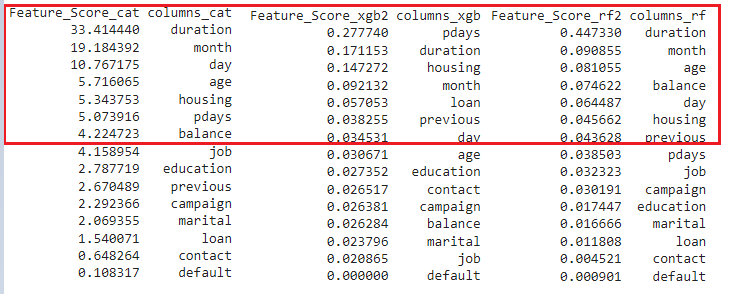

# **New Training and testing dataset with selected features => x_train1 , x_test1**

In [28]:
x_train1=x_train[['duration','housing', 'age', 'day', 'month','balance', 'pdays']]
x_test1=x_test[['duration','housing', 'age', 'day', 'month','balance', 'pdays']]

In [29]:
# Initialize classifiers
catboost1 = CatBoostClassifier(
    subsample= 0.8,
    n_estimators= 450,
    learning_rate= 0.09,
    depth= 5,
    cat_features=['day', 'month',"housing"],
    custom_metric=['AUC'],
    verbose=False
)
xgb1 = XGBClassifier(
    subsample = 1,
    n_estimators = 200,
    min_child_weight = 10,
    max_depth = 10,
    learning_rate = 0.05,
    colsample_bytree = 0.5
)
random_forest1 = RandomForestClassifier(
    n_estimators= 300,
    min_samples_split= 6,
    min_samples_leaf= 2,
    max_features= "auto",
    max_depth=15,
    class_weight= "balanced",
    bootstrap= True
)

# Train classifiers
catboost1.fit(x_train1, y_train)
random_forest1.fit(x_train1, y_train)
xgb1.fit(x_train1, y_train)

# Get predicted probabilities for the positive class
c_probs = catboost1.predict_proba(x_test1)[:, 1]
r_probs = random_forest1.predict_proba(x_test1)[:, 1]
x_probs = xgb1.predict_proba(x_test1)[:, 1]

# Calculate ROC curve and AUC score for each model
fpr_catboost, tpr_catboost, c_thre = roc_curve(y_test, c_probs)
roc_auc_catboost = roc_auc_score(y_test, c_probs)

fpr_rf, tpr_rf, r_thre = roc_curve(y_test, r_probs)
roc_auc_rf = roc_auc_score(y_test, r_probs)

fpr_xgb, tpr_xgb, x_thre = roc_curve(y_test, x_probs)
roc_auc_xgb = roc_auc_score(y_test, x_probs)

# Calculate Precision-Recall curve and AUC score for each model
precision_catboost, recall_catboost, _ = precision_recall_curve(y_test, c_probs)
prc_auc_catboost = average_precision_score(y_test, c_probs)

precision_rf, recall_rf, _ = precision_recall_curve(y_test, r_probs)
prc_auc_rf = average_precision_score(y_test, r_probs)

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, x_probs)
prc_auc_xgb = average_precision_score(y_test, x_probs)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [32]:
evaluate_model(catboost1,x_test1,y_test)
evaluate_model(random_forest1,x_test1,y_test)
evaluate_model(xgb1,x_test1,y_test)

Accuracy:  85.53515450067174
f1 score :  0.8553515450067174
roc_score :  0.85603293244914
prc_score :  0.790426735771544
Precision: 0.8318815331010453
Recall: 0.880184331797235
specificity :  0.8318815331010453
Confusion Matrix:
[[955 193]
 [130 955]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1148
           1       0.83      0.88      0.86      1085

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233

Accuracy:  82.98253470667264
f1 score :  0.82836495031617
roc_score :  0.8302461503877712
prc_score :  0.7616947228496721
Precision: 0.812223206377325
Recall: 0.8451612903225807
specificity :  0.8153310104529616
Confusion Matrix:
[[936 212]
 [168 917]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1148
           1       0.81      0.85      0.83      1085

    

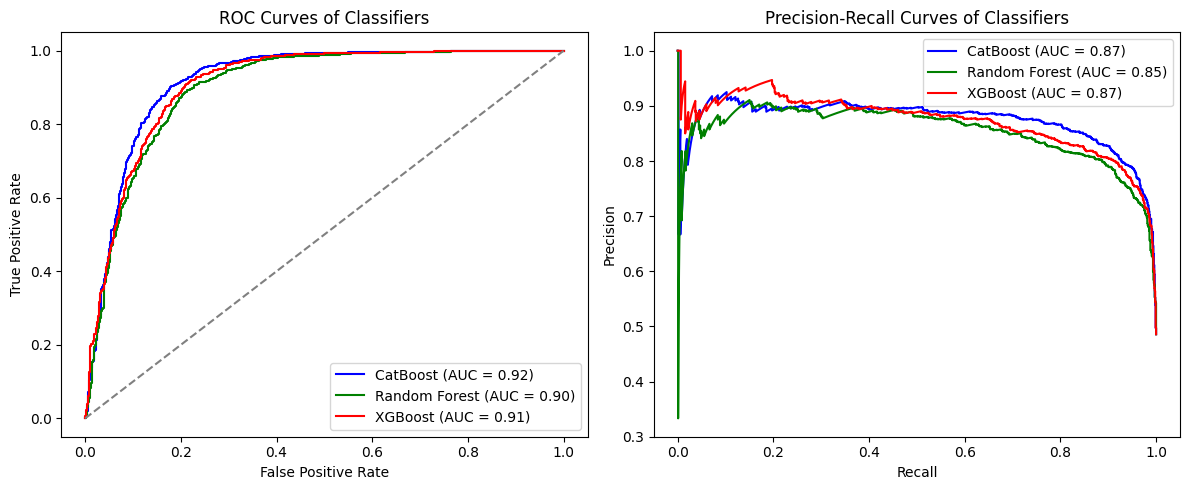

In [33]:
# Plot ROC curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_catboost, tpr_catboost, color='b', label=f'CatBoost (AUC = {roc_auc_catboost:.2f})')
plt.plot(fpr_rf, tpr_rf, color='g', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='r', label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Classifiers')
plt.legend()

# Plot PRC curves
plt.subplot(1, 2, 2)
plt.plot(recall_catboost, precision_catboost, color='b', label=f'CatBoost (AUC = {prc_auc_catboost:.2f})')
plt.plot(recall_rf, precision_rf, color='g', label=f'Random Forest (AUC = {prc_auc_rf:.2f})')
plt.plot(recall_xgb, precision_xgb, color='r', label=f'XGBoost (AUC = {prc_auc_xgb:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves of Classifiers')
plt.legend()

plt.tight_layout()
plt.show()

# **Obtaining Optimal threshold value**

In [ ]:
optimal_idx = np.argmax(tpr_catboost - fpr_catboost)
optimal_threshold = c_thre[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.4607133424763449


# **Evaluating Models with Optimal Threshold Value**

In [ ]:
def evaluate_model1(model, x_test, y_test, threshold= 0.46):
    from sklearn import metrics

    # Predict Test Data
    y_pred_proba1 = model.predict_proba(x_test)[:, 1]
    ypred = (y_pred_proba1 >= threshold).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test,ypred)*100
    precision = precision_score(y_test,ypred)
    recall = recall_score(y_test,ypred)
    conf_matrix = confusion_matrix(y_test,ypred)
    f1 = f1_score(y_test,ypred)

    roc_score = roc_auc_score(y_test,ypred)
    prc_score = average_precision_score(y_test,ypred)

    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)
    print("Accuracy: ",accuracy)
    print("f1 score : ",f1)
    print("roc_score : " ,roc_score)
    print("prc_score : " , prc_score)
    print("Precision:",precision)
    print("Recall:",recall)
    print("specificity : ",specificity)
    print("Confusion Matrix:")
    print(conf_matrix)
    print(classification_report(y_test,ypred))

In [ ]:
evaluate_model1(catboost1,x_test1,y_test)
evaluate_model1(random_forest1,x_test1,y_test)
evaluate_model1(xgb1,x_test1,y_test)

Accuracy:  86.07254814151366
f1 score :  0.8630559225011009
roc_score :  0.8618916488704058
prc_score :  0.793363672344815
Precision: 0.8263069139966274
Recall: 0.9032258064516129
specificity :  0.8205574912891986
Confusion Matrix:
[[942 206]
 [105 980]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1148
           1       0.83      0.90      0.86      1085

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233

Accuracy:  83.65427675772503
f1 score :  0.8387096774193549
roc_score :  0.8375885129819041
prc_score :  0.7655285554201724
Precision: 0.8056027164685908
Recall: 0.8746543778801843
specificity :  0.8005226480836237
Confusion Matrix:
[[919 229]
 [136 949]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1148
           1       0.81      0.87      0.84      1085

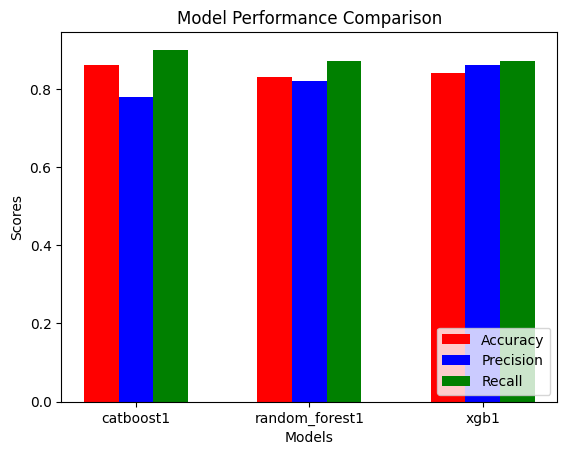

In [ ]:
accuracy = [0.86, 0.83, 0.84]
Precision= [0.82, 0.80, 0.81]
recall = [0.90, 0.87, 0.87]

bar_width = 0.2

r1 = [0, 1, 2]  # X-coordinates for the models
r2 = [0.2, 1.2, 2.2]  # X-coordinates for precision
r3 = [0.4, 1.4, 2.4]  # X-coordinates for recall

plt.bar(r1, accuracy, color='r', width=bar_width, label='Accuracy')
plt.bar(r2, precision, color='b', width=bar_width, label='Precision')
plt.bar(r3, recall, color='g', width=bar_width, label='Recall')

models = ['catboost1', 'random_forest1', 'xgb1']
plt.xlabel('Models')
plt.xticks([0.2, 1.2, 2.2], models)
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.legend( loc='lower right')

plt.show()


# **Final confusion matrix of CatBoostClassifier**

In [ ]:
catboost5 = CatBoostClassifier(
    subsample= 0.8,
    n_estimators= 450,
    learning_rate= 0.09,
    depth= 5,
    cat_features=['day', 'month',"housing"],
    custom_metric=['AUC'],
    verbose=False
)
catboost5.fit(x_train1,y_train)
y_pred_proba5= catboost5.predict_proba(x_test1)[:, 1]
y_final=(y_pred_proba5 >=0.46).astype(int)
final_matrix = confusion_matrix(y_test,y_final)

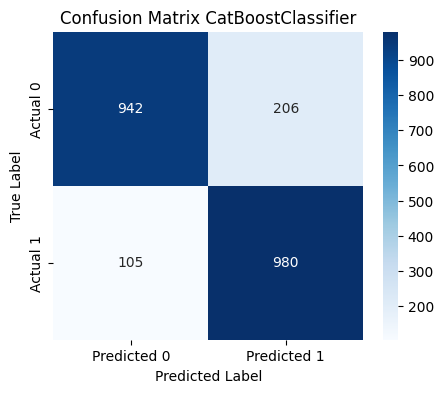

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(final_matrix, annot=True,fmt='g' ,cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix CatBoostClassifier')
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracy = cross_val_score(CatBoostClassifier(
                                            subsample= 0.8,
                                            n_estimators= 450,
                                            learning_rate= 0.09,
                                            depth= 5,
                                            cat_features=['day', 'month',"housing"],
                                            verbose=False
                                        )
                    ,x_train1,y_train,cv=stratified_kfold, scoring='accuracy')

print("accuracy scores for each fold: ", accuracy)
print("average accuracy: ", accuracy.mean())

accuracy scores for each fold:  [0.87905935 0.85666293 0.84546473 0.87234043 0.86674132 0.84770437
 0.8656215  0.85106383 0.8600224  0.83408072]
average accuracy:  0.8578761568552619


# **Saving model using pickle**

In [ ]:
import pickle

In [ ]:
filename="catboost"
pickle.dump(catboost1,open(filename,'wb'))

# **Testing Model**

In [ ]:
x_test1.head(3)

,duration,housing,age,day,month,balance,pdays
833,913,0,57,21,1,96,0
9934,163,0,47,1,5,145,0
7195,36,1,50,28,1,565,0


In [ ]:
openmodel=open('catboost','rb')
load_model=pickle.load(openmodel)

In [ ]:
pred1 = load_model.predict([913,0,57,21,1,96,0])
pred2 = load_model.predict([163,0,47,1,5,145,0])
pred3 = load_model.predict([36,1,50,28,1,565,0])
print(pred1)
print(pred2)
print(pred3)

1
0
0


In [ ]:
y_test.head(3) ##### achieved same result  :)

833     1
9934    0
7195    0
Name: deposit, dtype: int64

In [ ]:
from google.colab import files
files.download('catboost')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#            Model  Accuracy  Precision  Recall  F1 Score  AUC  Specificity  \
# 0  Random Forest     83.79       0.81    0.87      0.84 0.84         0.80
# 1       catBoost     86.07       0.83    0.90      0.86 0.86         0.82
# 2        XGBoost     84.19       0.82    0.87      0.84 0.84         0.82

    PRC score
 0       0.77
 1       0.79
 2       0.77

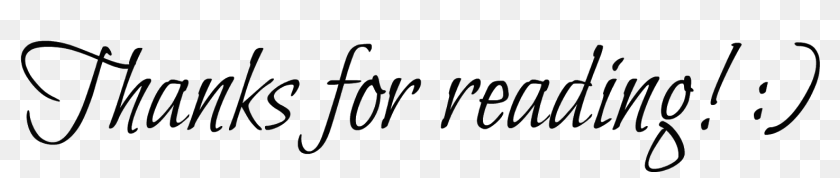